<a href="https://colab.research.google.com/github/sohdacafe/cheat_sheet/blob/main/calif_house_data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_name = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_name)
df

longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]

In [3]:
df.describe()

longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.566375       119400.000000
50%     -118.490000     34.250000  ...       3.544600       180400.000000
75%     -118.000000     37.720000  ...       4.767000       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

In [4]:
df.corr()

longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.925208  ...      -0.015485           -0.044982
latitude            -0.925208  1.000000  ...      -0.080303           -0.144917
housing_median_age  -0.114250  0.016454  ...      -0.115932            0.106758
total_rooms          0.047010 -0.038773  ...       0.195383            0.130991
total_bedrooms       0.071802 -0.069373  ...      -0.013495            0.045783
population           0.101674 -0.111261  ...      -0.000638           -0.027850
households           0.059628 -0.074902  ...       0.007644            0.061031
median_income       -0.015485 -0.080303  ...       1.000000            0.691871
median_house_value  -0.044982 -0.144917  ...       0.691871            1.000000

[9 rows x 9 columns]

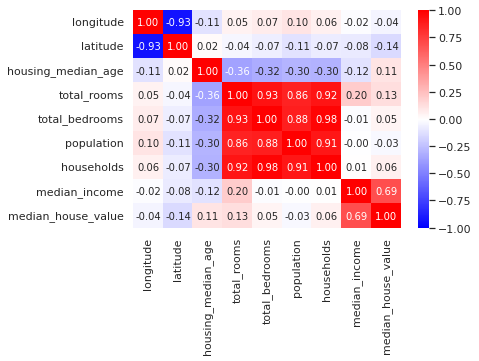

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='bwr', fmt='.2f', vmax=1, vmin=-1, center=0)

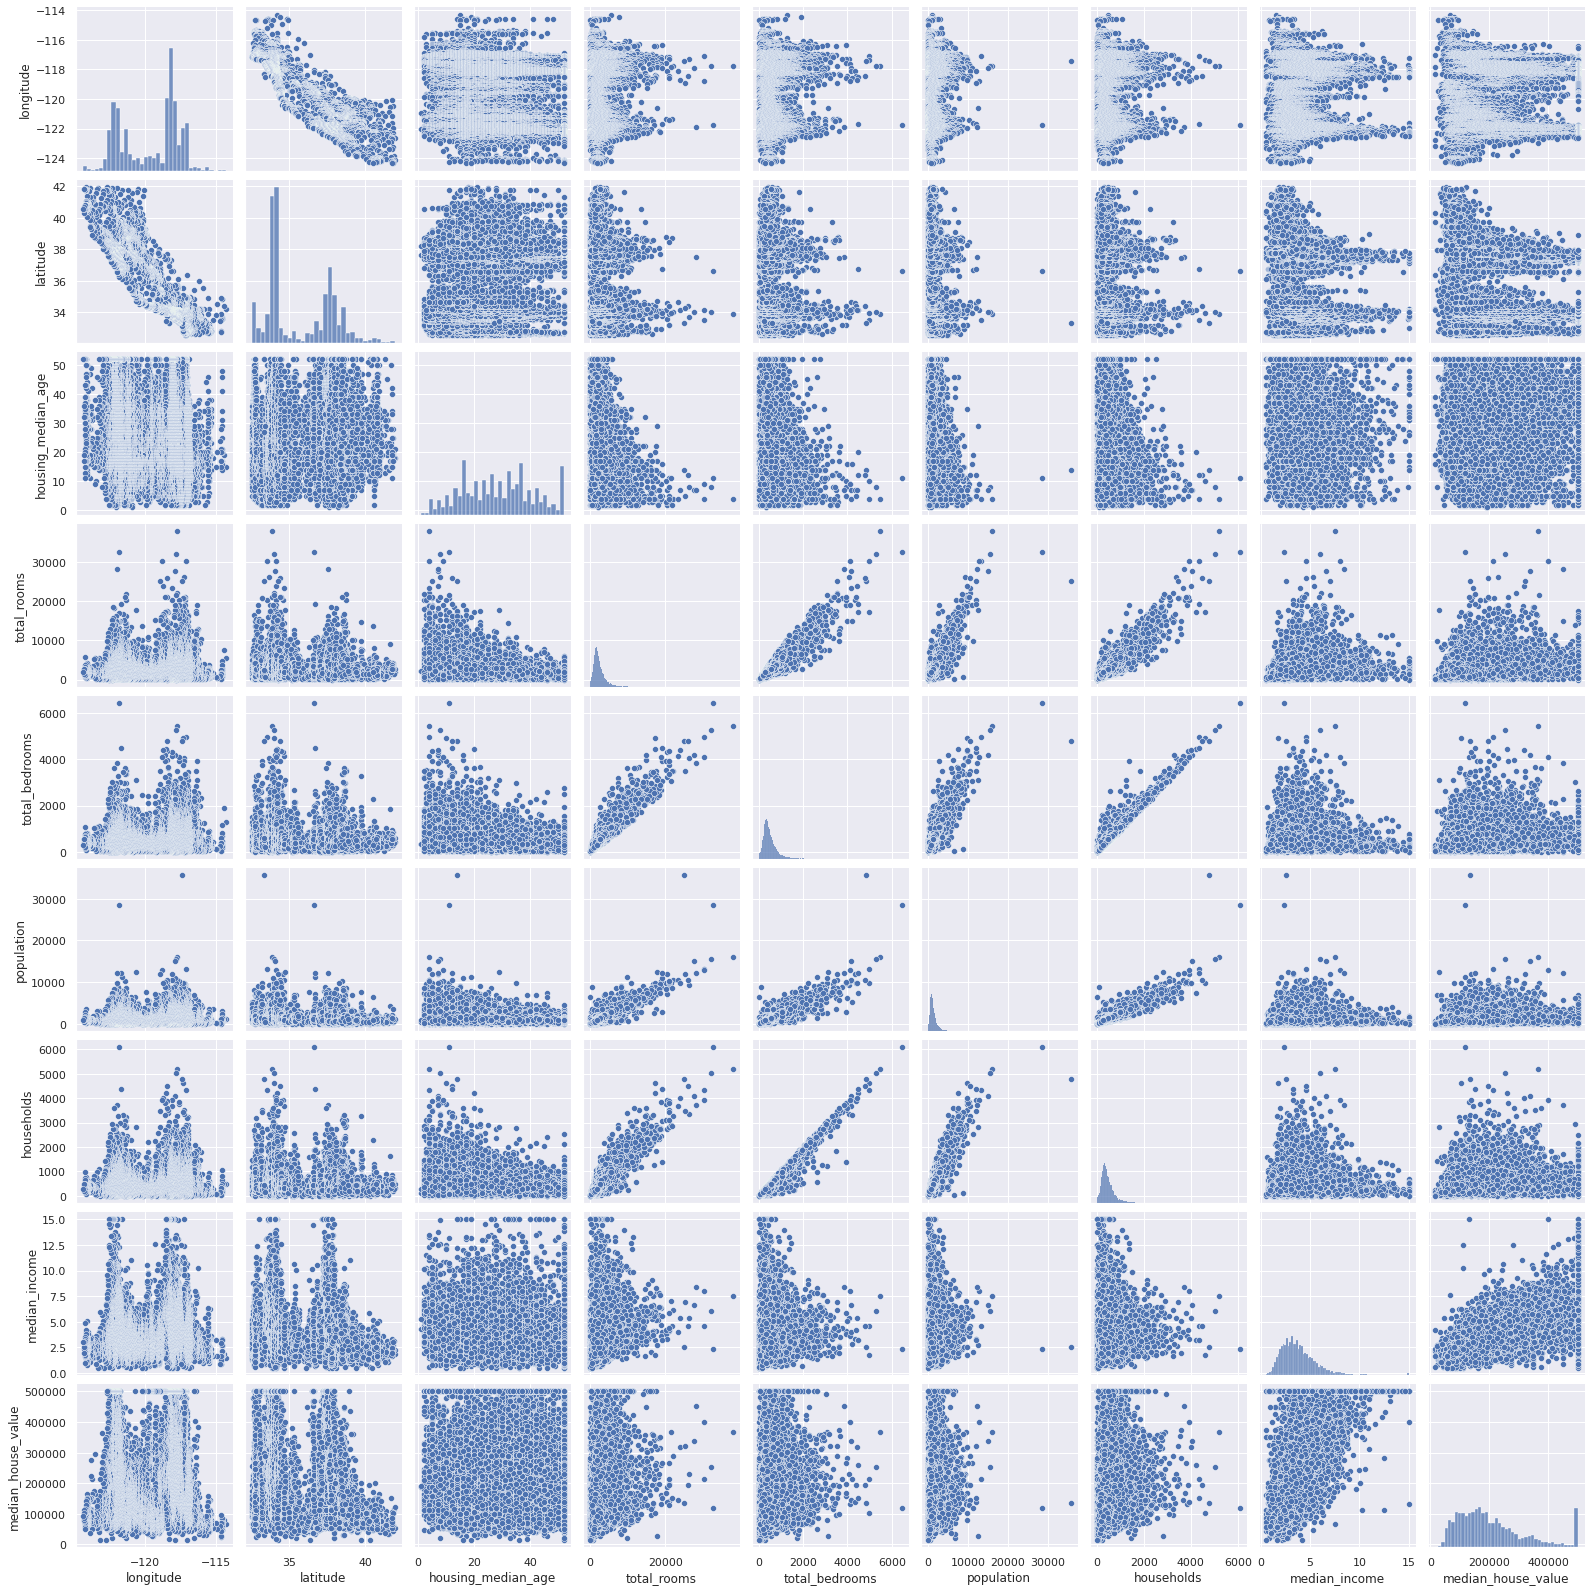

In [6]:
sns.pairplot(df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


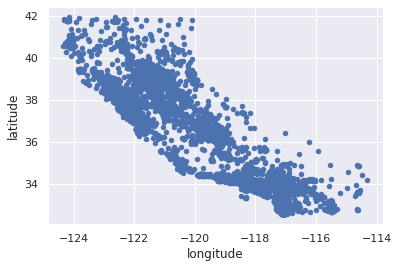

In [7]:
df.plot.scatter('longitude', 'latitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


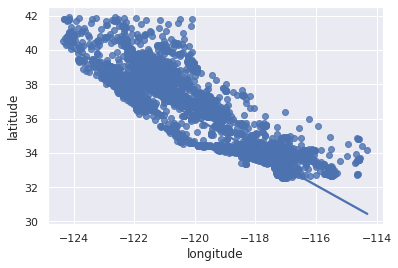

In [8]:
sns.regplot(df['longitude'], df['latitude'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


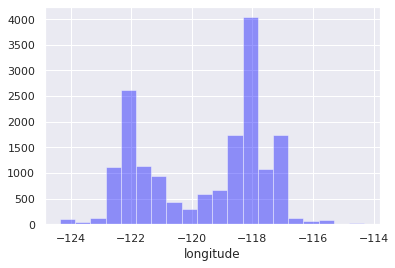

In [9]:
sns.distplot(df['longitude'], kde=False, bins=20, color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


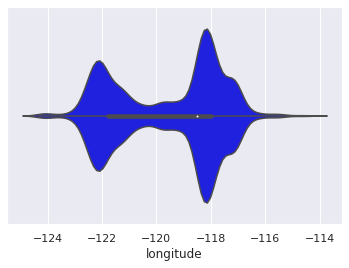

In [10]:
sns.violinplot(df['longitude'], kde=False, bins=20, color="blue")

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
df_mhu = df[df['median_house_value'] > 200000]
df_mhl = df[df['median_house_value'] < 200000]

In [25]:
df_mhu.shape, df_mhl.shape

((7190, 9), (9773, 9))

In [60]:
# median_house_valueの値を基にカテゴリ分け
df['median_house_value_cat']
df.loc[df['median_house_value'] >200000, 'median_house_value_cat'] = 'mhu'
df.loc[df['median_house_value'] <200000, 'median_house_value_cat'] = 'mhl'

In [61]:
# カテゴリ分け毎の平均値算出
df.groupby('median_house_value_cat')['median_house_value'].mean()

median_house_value_cat
mhl    127724.117057
mhu    314911.818735
Name: median_house_value, dtype: float64

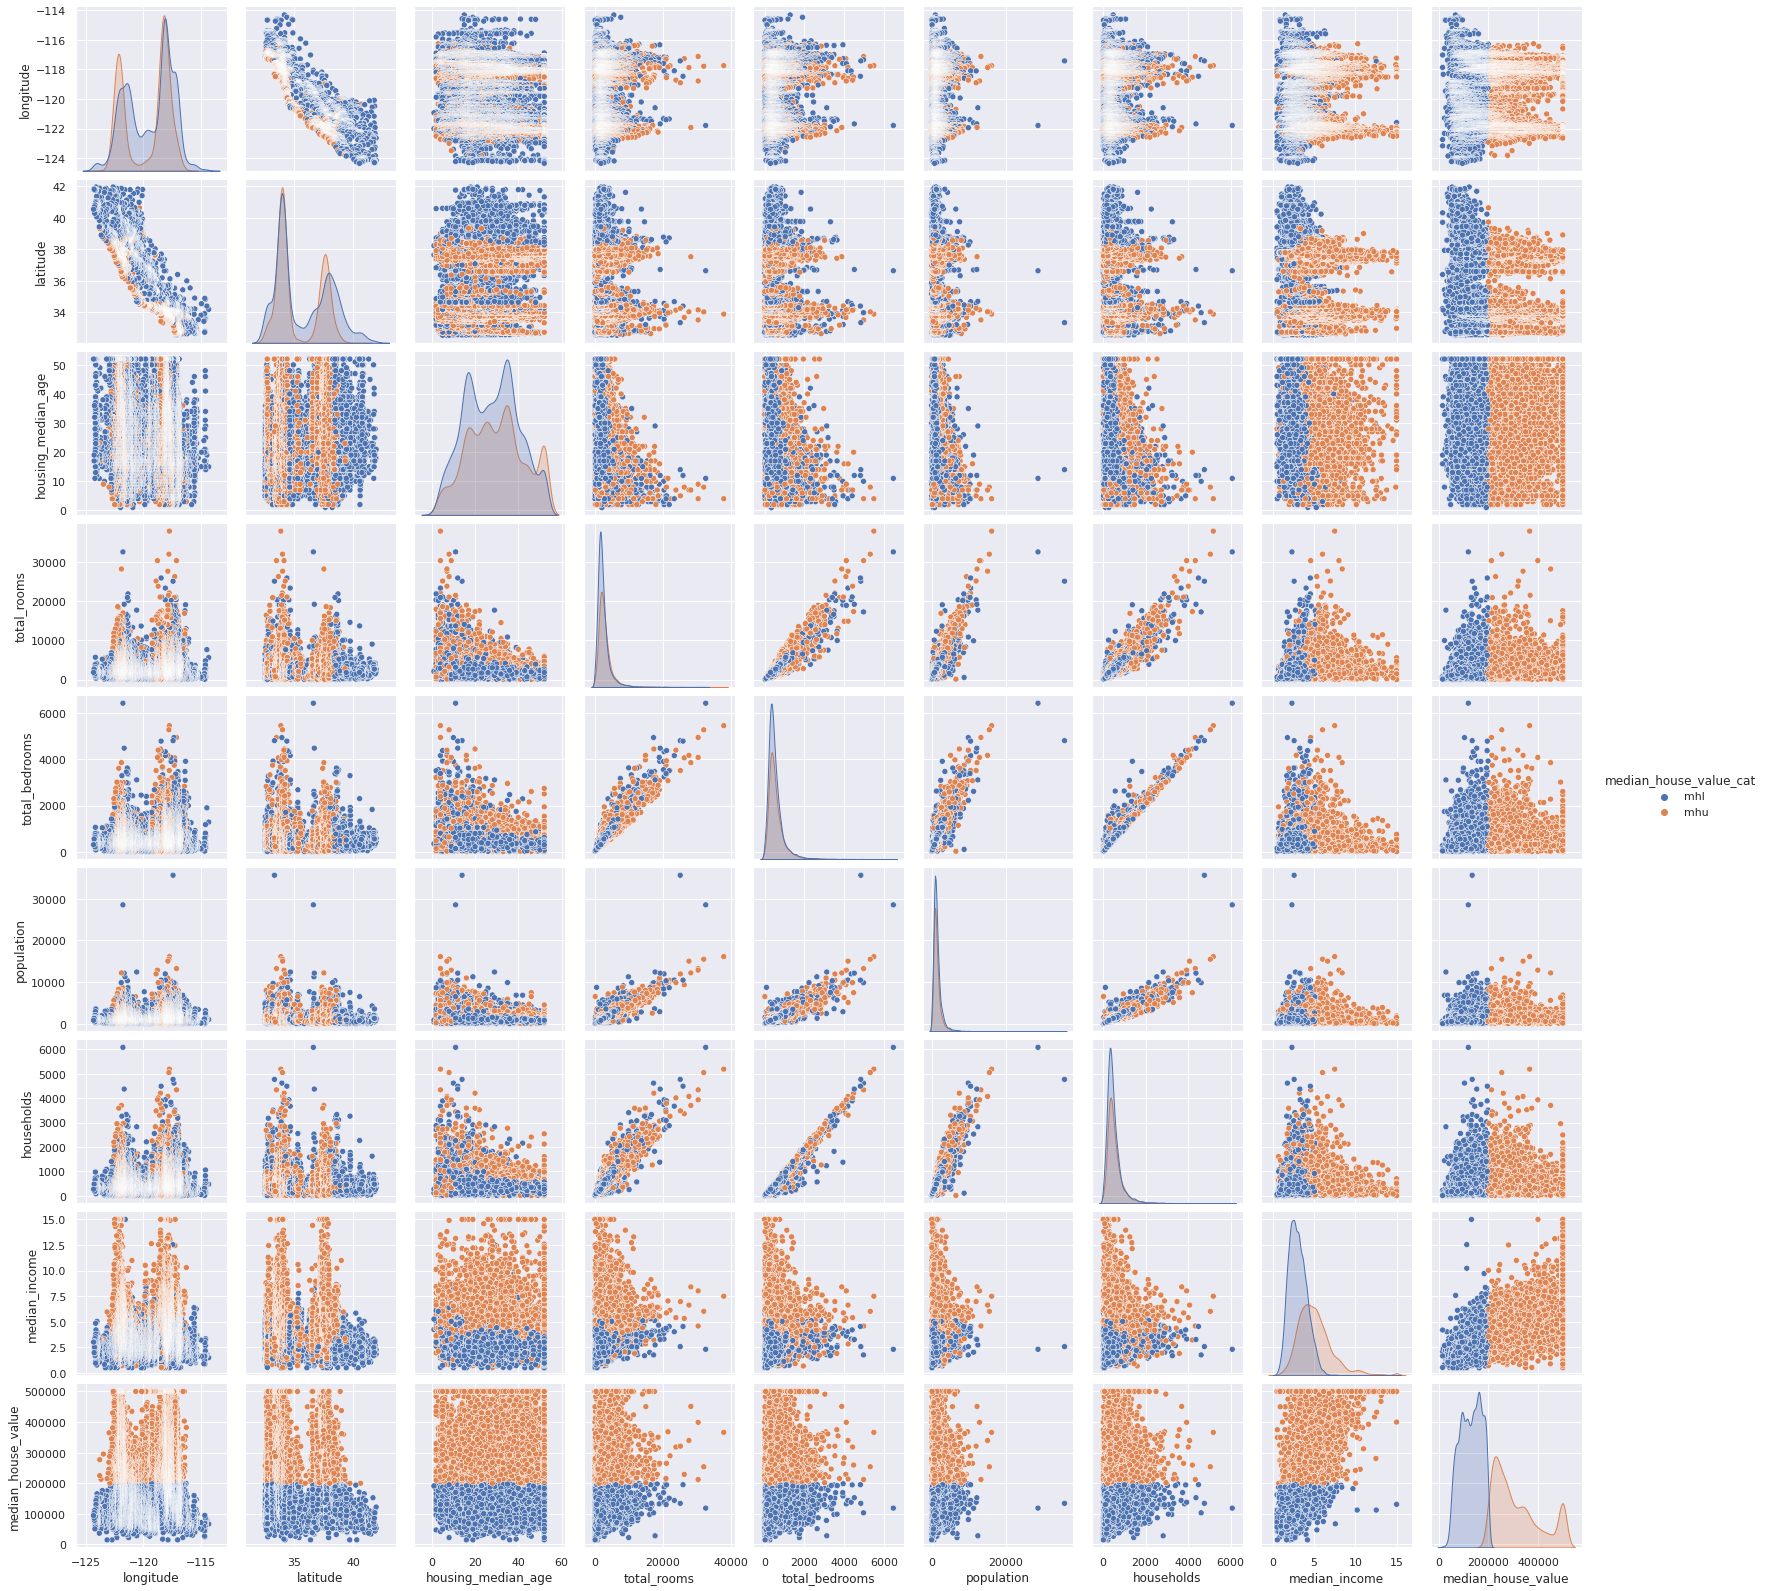

In [62]:
sns.pairplot(data=df, hue = 'median_house_value_cat')